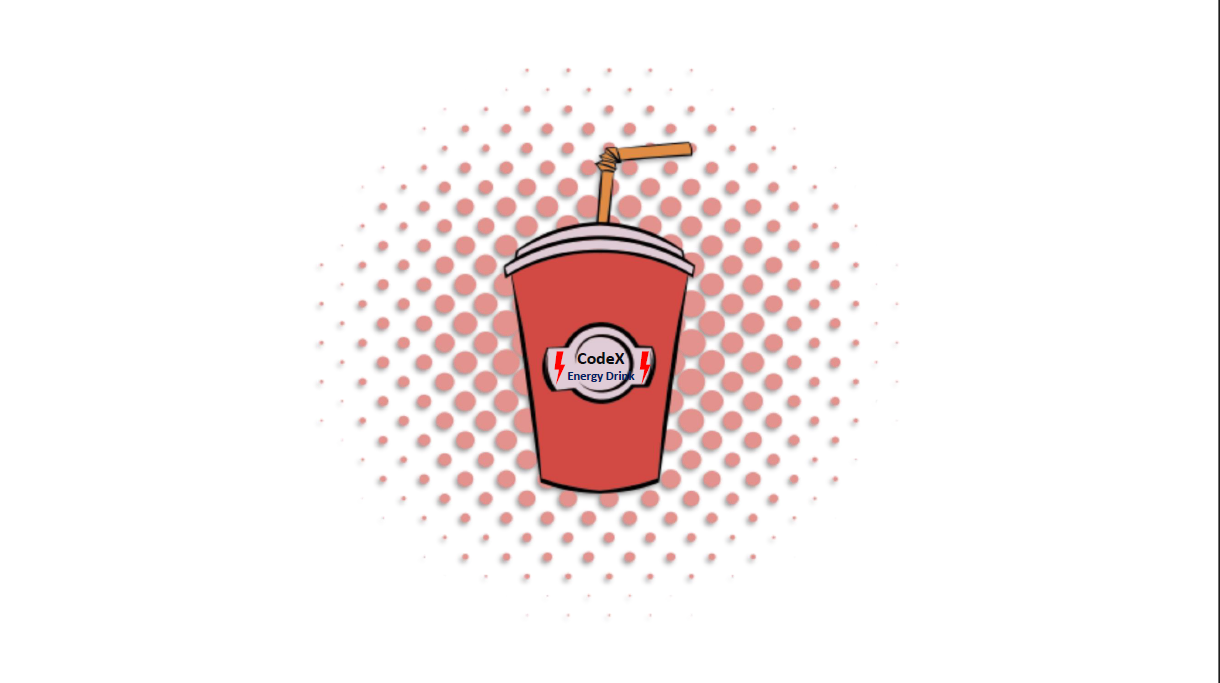

CodeX is a German beverage company that is aiming to make its mark in the Indian market. A few months ago, they launched their energy drink in 10 cities in India.

Their Marketing team is responsible for increasing brand awareness, market share, and product development. They conducted a survey in those 10 cities and received results from 10k respondents. Peter Pandey, a marketing data analyst is tasked to convert these survey results to meaningful insights which the team can use to drive actions.

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
city = pd.read_csv('dim_cities.csv')
city.head()

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [3]:
respondent = pd.read_csv('dim_repondents.csv')
respondent.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [4]:
survy_response = pd.read_csv('fact_survey_responses.csv')
survy_response.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


# Shape of data

In [5]:
# Shape will return no of records and no of features
print('Shape of city dataframe is:',city.shape)
print('Shape of respondent dataframe is:',respondent.shape)
print('Shape of survey dataframe is:',survy_response.shape)

Shape of city dataframe is: (10, 3)
Shape of respondent dataframe is: (10000, 5)
Shape of survey dataframe is: (10000, 23)


# Sanity check of data

In [6]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City_ID  10 non-null     object
 1   City     10 non-null     object
 2   Tier     10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [7]:
respondent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [8]:
survy_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

# Checking for the Null Values

In [9]:
city.isnull().sum()

City_ID    0
City       0
Tier       0
dtype: int64

In [10]:
respondent.isnull().sum()

Respondent_ID    0
Name             0
Age              0
Gender           0
City_ID          0
dtype: int64

In [11]:
survy_response.isnull().sum()

Response_ID                       0
Respondent_ID                     0
Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
dtype: int64

# Checking for the Duplicates Values

In [12]:
print('Duplicate values in our city dataframe is:',city.duplicated().sum())
print('Duplicate values in our respondent dataframe is:',respondent.duplicated().sum())
print('Duplicate values in our survey dataframe is:',survy_response.duplicated().sum())

Duplicate values in our city dataframe is: 0
Duplicate values in our respondent dataframe is: 0
Duplicate values in our survey dataframe is: 0


#  Stastical summary

In [13]:
city.describe().T

,count,unique,top,freq
City_ID,10,10,CT111,1
City,10,10,Delhi,1
Tier,10,2,Tier 1,5


In [14]:
respondent.describe().T

,count,mean,std,min,25%,50%,75%,max
Respondent_ID,10000.0,125030.5,2886.89568,120031.0,122530.75,125030.5,127530.25,130030.0


In [15]:
survy_response.describe().T

,count,mean,std,min,25%,50%,75%,max
Response_ID,10000.0,108000.5000,2886.895680,103001.0,105500.75,108000.5,110500.25,113000.0
Respondent_ID,10000.0,125030.5000,2886.895680,120031.0,122530.75,125030.5,127530.25,130030.0
Taste_experience,10000.0,3.2819,1.239752,1.0,2.00,3.0,4.00,5.0


# 1. Demographic Insights

### a. Who prefers energy drink more? (male/female/non-binary?)

In [16]:
daily = survy_response.groupby('Consume_frequency').get_group('Daily')
df = pd.merge(daily,respondent,on='Respondent_ID',how='inner')
gender_count = df['Gender'].value_counts()
gender_count

Gender
Male          817
Female        466
Non-binary     63
Name: count, dtype: int64

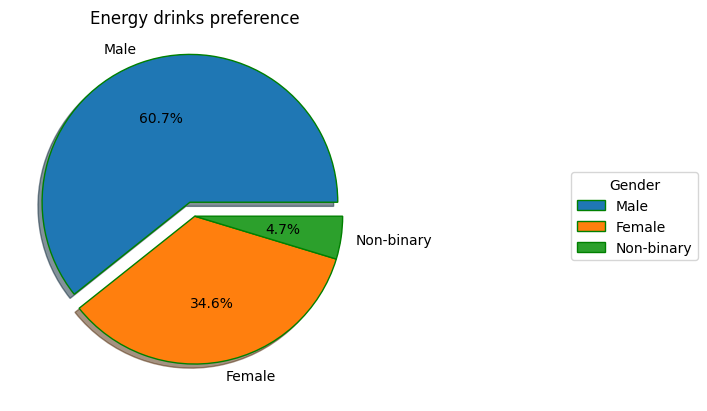

In [17]:
plt.title("Energy drinks preference")
plt.pie(gender_count,
        labels=gender_count.index,
        colors=None,
        shadow=True,
        normalize=True,
        explode=[0.1,0,0],
        autopct='%1.1f%%',
        wedgeprops={'linewidth': 1, 'edgecolor': "green"}
       )
# Adding the legend
plt.legend(gender_count.index, title="Gender", loc="center left", bbox_to_anchor=(1.5, 0.5))

plt.show()

### b. Which age group prefers energy drinks more?

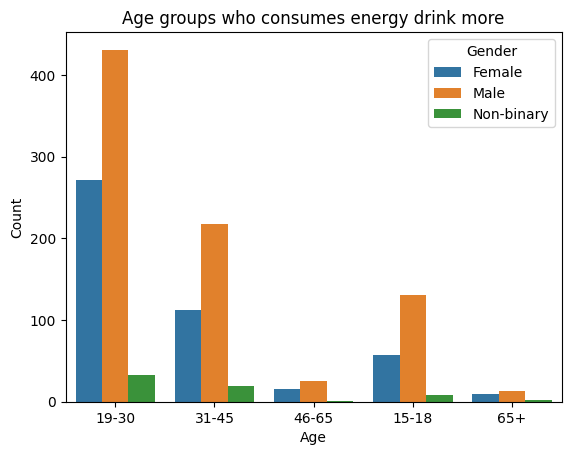

In [18]:
daily = survy_response.groupby('Consume_frequency').get_group('Daily')
age = respondent[['Respondent_ID','Age','Gender']]
df_1 = pd.merge(age, daily, on='Respondent_ID',how='inner')

sns.countplot(x='Age',hue='Gender',data=df_1,)
plt.title('Age groups who consumes energy drink more')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### c. Which type of marketing reaches the most Youth (15-30)?

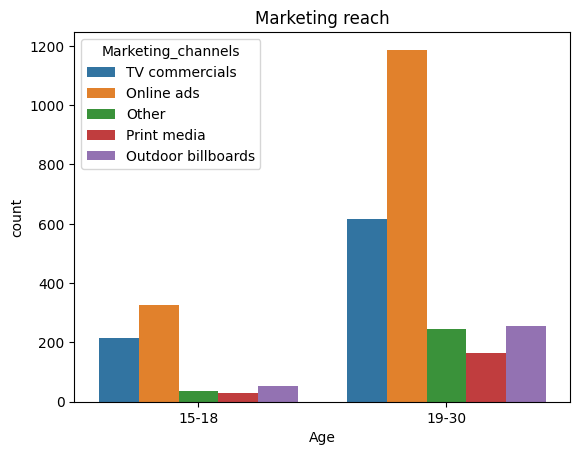

In [19]:
marketing=survy_response.groupby('Heard_before').get_group('Yes')
age1=respondent[(respondent['Age']=='15-18')|(respondent['Age']=='19-30')]
df1=pd.merge(marketing,age1,how='inner')
df1
sns.countplot(x='Age',hue='Marketing_channels',data=df1)
plt.title('Marketing reach')
plt.show()

# 2. Consumer Preferences

### a. What are the preferred ingredients of energy drinks among respondents?

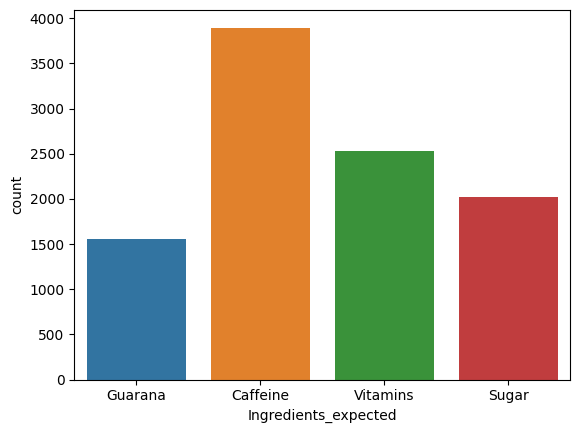

In [20]:
df=pd.merge(survy_response,respondent,on='Respondent_ID')
sns.countplot(x='Ingredients_expected',data=df)
plt.show()

### b. What packaging preferences do respondents have for energy drinks?

In [21]:
count=survy_response['Packaging_preference'].value_counts()
print(count)
print('**'*20)
percent=survy_response['Packaging_preference'].value_counts()/survy_response.shape[0]*100
print(percent)

Packaging_preference
Compact and portable cans    3984
Innovative bottle design     3047
Collectible packaging        1501
Eco-friendly design           983
Other                         485
Name: count, dtype: int64
****************************************
Packaging_preference
Compact and portable cans    39.84
Innovative bottle design     30.47
Collectible packaging        15.01
Eco-friendly design           9.83
Other                         4.85
Name: count, dtype: float64


Observation:- Approximately 40% of customer will prefer to have packaging as 'Compact and portable cans' and 30% Innovative bottle designe. But only 9.83% customer prefer Eco frendly design

# 3. Competition Analysis

### a. Who are the current market leaders?

In [22]:
market_leader=survy_response['Current_brands']
a=market_leader.value_counts()
b=market_leader.value_counts()/survy_response.shape[0]*100
print('Current market leaders:',a)
print("**"*15)
print('Current Market Leaders Share is:',b)

Current market leaders: Current_brands
Cola-Coka    2538
Bepsi        2112
Gangster     1854
Blue Bull    1058
CodeX         980
Sky 9         979
Others        479
Name: count, dtype: int64
******************************
Current Market Leaders Share is: Current_brands
Cola-Coka    25.38
Bepsi        21.12
Gangster     18.54
Blue Bull    10.58
CodeX         9.80
Sky 9         9.79
Others        4.79
Name: count, dtype: float64


Observation:- Cola-coka has maximum share of market which is 25%,Bepsi has 21% of total market share our company
holds 5th position with share of 9%.

### b. What are the primary reasons consumers prefer those brands over ours?

In [23]:
brand=survy_response['Reasons_for_choosing_brands']
a=brand.value_counts()
b=brand.value_counts()/survy_response.shape[0]*100
print('Current market leaders:',a)
print("**"*15)
print('Current Market Leaders Share is:',b)


Current market leaders: Reasons_for_choosing_brands
Brand reputation           2652
Taste/flavor preference    2011
Availability               1910
Effectiveness              1748
Other                      1679
Name: count, dtype: int64
******************************
Current Market Leaders Share is: Reasons_for_choosing_brands
Brand reputation           26.52
Taste/flavor preference    20.11
Availability               19.10
Effectiveness              17.48
Other                      16.79
Name: count, dtype: float64


# 4. Marketing Channels and Brand Awareness

### 4. Which marketing channel can be used to reach more customers?

In [24]:
channel=survy_response['Marketing_channels']
a=channel.value_counts()
print('Most used marketing channel is:',a)

Most used marketing channel is: Marketing_channels
Online ads            4020
TV commercials        2688
Outdoor billboards    1226
Other                 1225
Print media            841
Name: count, dtype: int64


# 5. Brand Penetration:

### a. What do people think about our brand? (overall rating)

In [25]:
brand=survy_response['Reasons_for_choosing_brands']
a=brand.value_counts()
b=brand.value_counts()/survy_response.shape[0]*100
print('Current market leaders:',a)
print("**"*15)
print('Current Market Leaders Share is:',b)


Current market leaders: Reasons_for_choosing_brands
Brand reputation           2652
Taste/flavor preference    2011
Availability               1910
Effectiveness              1748
Other                      1679
Name: count, dtype: int64
******************************
Current Market Leaders Share is: Reasons_for_choosing_brands
Brand reputation           26.52
Taste/flavor preference    20.11
Availability               19.10
Effectiveness              17.48
Other                      16.79
Name: count, dtype: float64


In [26]:
brand = survy_response[survy_response['Current_brands'] == 'CodeX']
Reasons_for_choosing_brand_CodeX = brand['Reasons_for_choosing_brands'].value_counts()
Reasons_for_choosing_brand_CodeX

Reasons_for_choosing_brands
Brand reputation           259
Availability               195
Taste/flavor preference    182
Effectiveness              176
Other                      168
Name: count, dtype: int64

### b. Which cities do we need to focus more on?

In [28]:
df1=pd.merge(city,respondent)
count=df1['City'].value_counts().sort_values(ascending=True)
print('From below city we have very less penetration in bottom 3 city which are',count[0:3])
print('**'*15)
print(count)

From below city we have very less penetration in bottom 3 city which are City
Lucknow    175
Jaipur     360
Delhi      429
Name: count, dtype: int64
******************************
City
Lucknow       175
Jaipur        360
Delhi         429
Ahmedabad     456
Kolkata       566
Pune          906
Chennai       937
Mumbai       1510
Hyderabad    1833
Bangalore    2828
Name: count, dtype: int64


Observation:- We need to penetrate ('Lucknow','Jaipur','Delhi') as we have list preserence in this city

# 6. Purchase Behavior

### a. Where do respondents prefer to purchase energy drinks?

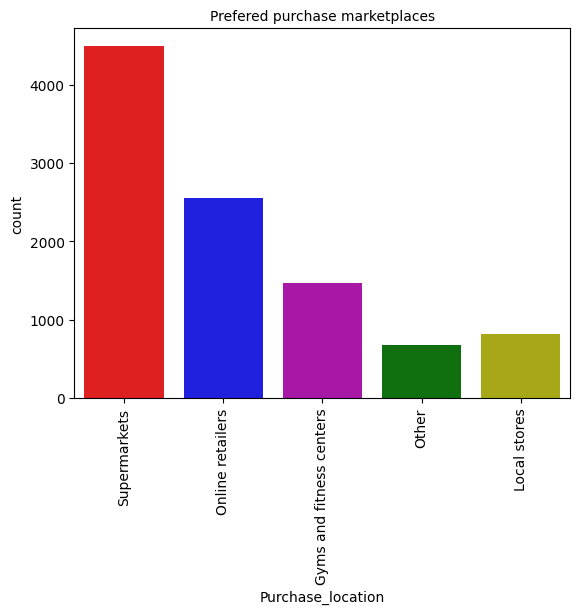

In [34]:
df=survy_response['Purchase_location']
df.value_counts()
sns.countplot(x=df)
plt.xlabel("Location",fontsize = 10)
plt.ylabel("Count",fontsize = 10)
plt.xticks(rotation = 90)
plt.title("Prefered purchase marketplaces",fontsize = 10)
sns.countplot(x=df, palette=["r", "b", "m", "g","y"])
plt.show()

### b. What are the typical consumption situations for energy drinks among respondents?

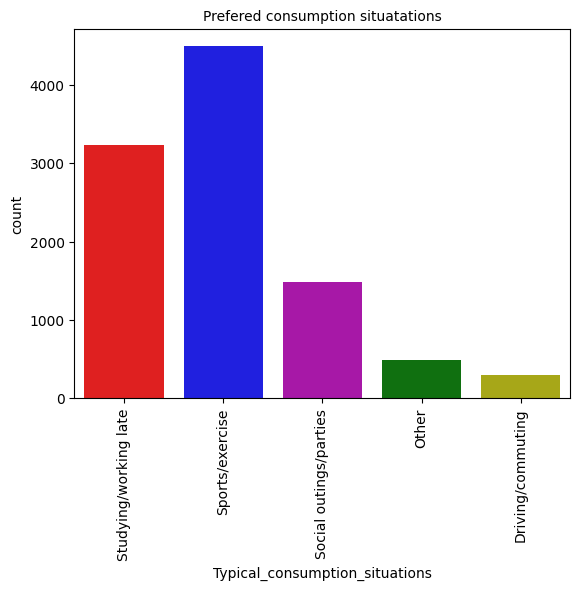

In [38]:
df=survy_response['Typical_consumption_situations']
df.value_counts()
sns.countplot(x=df)
plt.xlabel("Time",fontsize = 10)
plt.ylabel("Count",fontsize = 10)
plt.xticks(rotation=90)
plt.title("Prefered consumption situatations",fontsize = 10)
sns.countplot(x=df, palette=["r", "b", "m", "g","y"])
plt.show()
# Obervation:- Most customer prefer consume energy drinks before sports and excercise


### c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

In [40]:
df=survy_response['Price_range']
a=df.value_counts()
b=df.value_counts()/survy_response.shape[0]*100
print(b)
print('*'*25)
df1=survy_response['Limited_edition_packaging']
c=df1.value_counts()
d=df1.value_counts()/survy_response.shape[0]*100
print(d)

Price_range
50-99        42.88
100-150      31.42
Above 150    15.61
Below 50     10.09
Name: count, dtype: float64
*************************
Limited_edition_packaging
No          40.23
Yes         39.46
Not Sure    20.31
Name: count, dtype: float64


# 7. Product Development

### a. Which area of business should we focus more on our product development? (Branding/taste/availability)

# Observations